# Лабораторна №2
## Варіант 3
1, 2, 4, 5, 6, 7, 8, 9, 10, 11, 12, 18, 19, 20, 21, 23, 25, 27

In [3]:
import pandas as pd

file_path = 'NationalNames.csv'

df = pd.read_csv(file_path)

print(df.head(8))


   Id       Name  Year Gender  Count
0   1       Mary  1880      F   7065
1   2       Anna  1880      F   2604
2   3       Emma  1880      F   2003
3   4  Elizabeth  1880      F   1939
4   5     Minnie  1880      F   1746
5   6   Margaret  1880      F   1578
6   7        Ida  1880      F   1472
7   8      Alice  1880      F   1414


In [3]:
import pandas as pd

file_path = 'NationalNames.csv'

df = pd.read_csv(file_path)

print(df.tail(8))


              Id     Name  Year Gender  Count
1825425  1825426       Zo  2014      M      5
1825426  1825427    Zyeir  2014      M      5
1825427  1825428     Zyel  2014      M      5
1825428  1825429   Zykeem  2014      M      5
1825429  1825430   Zymeer  2014      M      5
1825430  1825431  Zymiere  2014      M      5
1825431  1825432    Zyran  2014      M      5
1825432  1825433    Zyrin  2014      M      5


In [5]:
import pandas as pd

file_path = 'NationalNames.csv'

df = pd.read_csv(file_path)

print(df.describe())

                 Id          Year         Count
count  1.825433e+06  1.825433e+06  1.825433e+06
mean   9.127170e+05  1.972620e+03  1.846879e+02
std    5.269573e+05  3.352891e+01  1.566711e+03
min    1.000000e+00  1.880000e+03  5.000000e+00
25%    4.563590e+05  1.949000e+03  7.000000e+00
50%    9.127170e+05  1.982000e+03  1.200000e+01
75%    1.369075e+06  2.001000e+03  3.200000e+01
max    1.825433e+06  2.014000e+03  9.968000e+04


In [14]:
import pandas as pd

file_path = 'NationalNames.csv'

df = pd.read_csv(file_path)

unique_names = df.iloc[:, 1].nunique()

print(unique_names)

93889


In [16]:
#6
import pandas as pd

df = pd.read_csv('NationalNames.csv')

unique_female_names = df[df['Gender'] == 'F']['Name'].nunique()
unique_male_names = df[df['Gender'] == 'M']['Name'].nunique()

# Вивести результати
print("F:", unique_female_names)
print("M:", unique_male_names)

F: 64911
M: 39199


In [19]:
#7
import pandas as pd

df = pd.read_csv('NationalNames.csv')

male_names_2010 = df[(df['Gender'] == 'M') & (df['Year'] == 2010)]

name_counts = male_names_2010.groupby('Name').sum()['Count']

top_5_male_names = name_counts.nlargest(5)

print(top_5_male_names)

Name
Jacob      22082
Ethan      17985
Michael    17308
Jayden     17152
William    17030
Name: Count, dtype: int64


In [21]:
import pandas as pd

df = pd.read_csv('NationalNames.csv')

max_count_year = df.loc[df['Count'].idxmax(), 'Year']

most_popular_name = df[(df['Year'] == max_count_year) & (df['Count'] == df['Count'].max())]['Name'].iloc[0]

print(max_count_year, ":", most_popular_name)

1947 : Linda


In [22]:
#9
import pandas as pd

df = pd.read_csv('NationalNames.csv')

df = pd.read_csv(file_path)

min_count = df.iloc[:, 4].min()

min_value_rows = df[df.iloc[:, 4] == min_count]

quantity_min_value_rows = min_value_rows.shape[0]

print(quantity_min_value_rows)


Quantity of rows where the 5th column value is minimal: 254615


In [26]:
#10
import pandas as pd

df = pd.read_csv('NationalNames.csv')

unique_names = df.groupby('Year')['Name'].nunique()

print(unique_names)


Year
1880     1889
1881     1830
1882     2012
1883     1962
1884     2158
        ...  
2010    31603
2011    31418
2012    31236
2013    30774
2014    30579
Name: Name, Length: 135, dtype: int64


In [28]:
#11
import pandas as pd

df = pd.read_csv('NationalNames.csv')

unique_names_by_year = df.groupby('Year')['Name'].nunique()

year_with_most_unique_names = unique_names_by_year.idxmax()

print(year_with_most_unique_names)

2008


In [29]:
#12
import pandas as pd

df = pd.read_csv('NationalNames.csv')

year_with_max_unique_names = df.groupby('Year')['Name'].nunique().idxmax()

data_for_year = df[df['Year'] == year_with_max_unique_names]

most_popular_name = data_for_year.loc[data_for_year['Count'].idxmax(), 'Name']

print("Найпопулярніше ім'я у році з найбільшою кількістю унікальних імен (у", year_with_max_unique_names, "році):", most_popular_name)

Найпопулярніше ім'я у році з найбільшою кількістю унікальних імен (у 2008 році): Jacob


In [31]:
#18
import pandas as pd

df = pd.read_csv('NationalNames.csv')

gender_counts_by_year = df.groupby(['Year', 'Gender'])['Count'].sum()

gender_counts_by_year = gender_counts_by_year.unstack()

gender_difference_by_year = gender_counts_by_year['F'] - gender_counts_by_year['M']

years_with_more_girls = (gender_difference_by_year > 0).sum()

print(years_with_more_girls)

54


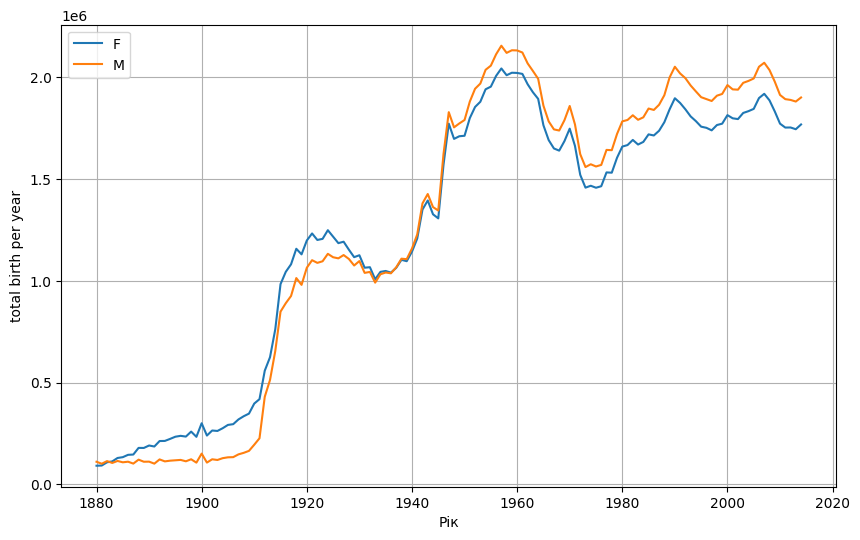

In [37]:
#19
import pandas as pd

df = pd.read_csv('NationalNames.csv')

import matplotlib.pyplot as plt

gender_counts_by_year = df.groupby(['Year', 'Gender'])['Count'].sum()

gender_counts_by_year = gender_counts_by_year.unstack()

# Накреслюємо графік
plt.figure(figsize=(10, 6))
plt.plot(gender_counts_by_year.index, gender_counts_by_year['F'], label='F')
plt.plot(gender_counts_by_year.index, gender_counts_by_year['M'], label='M')
plt.xlabel('Рік')
plt.ylabel('total birth per year')
plt.legend()
plt.grid(True)
plt.show()

In [39]:
#20
import pandas as pd

df = pd.read_csv('NationalNames.csv')

name_counts = df.groupby(['Name', 'Gender'])['Count'].sum()

gender_neutral_names = name_counts.unstack().dropna().index

count_gender_neutral_names = len(gender_neutral_names)

print(count_gender_neutral_names)

Кількість гендерно-нейтральних імен: 10221


In [41]:
#21
import pandas as pd

df = pd.read_csv('NationalNames.csv')

barbara_male_count = df[(df['Name'] == 'Barbara') & (df['Gender'] == 'M')]['Count'].sum()

print(barbara_male_count)

Кількість разів, коли хлопчиків називали Barbara: 4139


In [65]:
#23
import pandas as pd

df = pd.read_csv('NationalNames.csv')

name_counts = df.groupby(['Name', 'Gender'])['Count'].sum()

gender_neutral_names = name_counts[name_counts.index.get_level_values('Name').duplicated(keep=False)]

gender_neutral_counts = gender_neutral_names.groupby('Name').sum()

most_common_gender_neutral_names = gender_neutral_counts.nlargest(5)

print(most_common_gender_neutral_names)

Name
James      5129096
John       5106590
Robert     4816785
Michael    4330805
Mary       4130441
Name: Count, dtype: int64


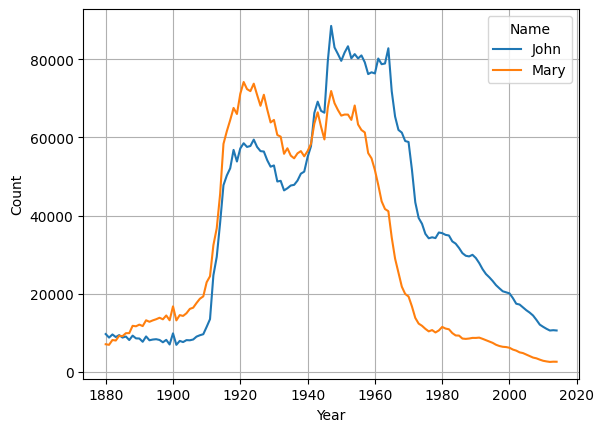

In [55]:
#25
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('NationalNames.csv')

john_mary_df = df[(df['Name'] == 'John') | (df['Name'] == 'Mary')]

name_year_counts = john_mary_df.groupby(['Year', 'Name'])['Count'].sum().unstack()

name_year_counts.plot(kind='line', marker='')
plt.xlabel('Year')
plt.ylabel('Count')
plt.grid(True)
plt.legend(title='Name')
plt.show()

In [57]:
#27
import pandas as pd

df = pd.read_csv('NationalNames.csv')

most_popular_names_index = df.groupby('Year')['Count'].idxmax()

most_popular_names = df.loc[most_popular_names_index, ['Year', 'Name', 'Count']]

print(most_popular_names)

         Year      Name  Count
942      1880      John   9655
2938     1881      John   8769
4963     1882      John   9557
7116     1883      John   8894
9318     1884      John   9388
...       ...       ...    ...
1657592  2010  Isabella  22883
1691633  2011    Sophia  21816
1725502  2012    Sophia  22267
1759186  2013    Sophia  21147
1792389  2014      Emma  20799

[135 rows x 3 columns]
